In [1]:
# Import our dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

# Upload and read the csv files
ais_df = pd.read_csv("ml_data_daily_2018.csv", index_col=0)

In [2]:
# Look at our data
ais_df.head()

,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable
2018/01/01,9,37,145,44,27,13,12,7
2018/01/02,13,45,119,41,27,14,19,10
2018/01/03,13,44,106,40,36,14,20,11
2018/01/04,15,44,103,45,30,10,15,12
2018/01/05,10,45,107,41,26,13,21,10


In [3]:
# Creating a total column for our data
ais_df['Total']= ais_df.sum(axis=1)
ais_df.head()

,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable,Total
2018/01/01,9,37,145,44,27,13,12,7,294
2018/01/02,13,45,119,41,27,14,19,10,288
2018/01/03,13,44,106,40,36,14,20,11,284
2018/01/04,15,44,103,45,30,10,15,12,274
2018/01/05,10,45,107,41,26,13,21,10,273


In [4]:
# Check the info of the DataFrame to make sure we have clean data
ais_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2018/01/01 to 2018/12/31
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Fishing       365 non-null    int64
 1   TugTow        365 non-null    int64
 2   Recreational  365 non-null    int64
 3   Passenger     365 non-null    int64
 4   Cargo         365 non-null    int64
 5   Tanker        365 non-null    int64
 6   Other         365 non-null    int64
 7   Unavailable   365 non-null    int64
 8   Total         365 non-null    int64
dtypes: int64(9)
memory usage: 28.5+ KB


In [5]:
# Create nine DataFrames, each with the Index and one unique column:

# Fishing
ais_fishing_df = ais_df.drop(["TugTow","Recreational","Passenger","Cargo","Tanker","Other","Unavailable","Total"], axis=1)
# TugTow
ais_tugtow_df = ais_df.drop(["Fishing","Recreational","Passenger","Cargo","Tanker","Other","Unavailable","Total"], axis=1)
# Recreational
ais_recreational_df = ais_df.drop(["Fishing","TugTow","Passenger","Cargo","Tanker","Other","Unavailable","Total"], axis=1)
# Passenger
ais_passenger_df = ais_df.drop(["Fishing","TugTow","Recreational","Cargo","Tanker","Other","Unavailable","Total"], axis=1)
# Cargo
ais_cargo_df = ais_df.drop(["Fishing","TugTow","Recreational","Passenger","Tanker","Other","Unavailable","Total"], axis=1)
# Tanker
ais_tanker_df = ais_df.drop(["Fishing","TugTow","Recreational","Passenger","Cargo","Other","Unavailable","Total"], axis=1)
# Other
ais_other_df = ais_df.drop(["Fishing","TugTow","Recreational","Passenger","Cargo","Tanker","Unavailable","Total"], axis=1)
# Unavailable
ais_unavailable_df = ais_df.drop(["Fishing","TugTow","Recreational","Passenger","Cargo","Tanker","Other","Total"], axis=1)
# Total
ais_total_df = ais_df.drop(["Fishing","TugTow","Recreational","Passenger","Cargo","Tanker","Other","Unavailable"], axis=1)

In [6]:
# From here we will be using 'Total' as an example, and repeating the code for the rest of the data

# Check the new Dataframe
ais_total_df

,Total
2018/01/01,294
2018/01/02,288
2018/01/03,284
2018/01/04,274
2018/01/05,273
...,...
2018/12/27,298
2018/12/28,298
2018/12/29,306
2018/12/30,308


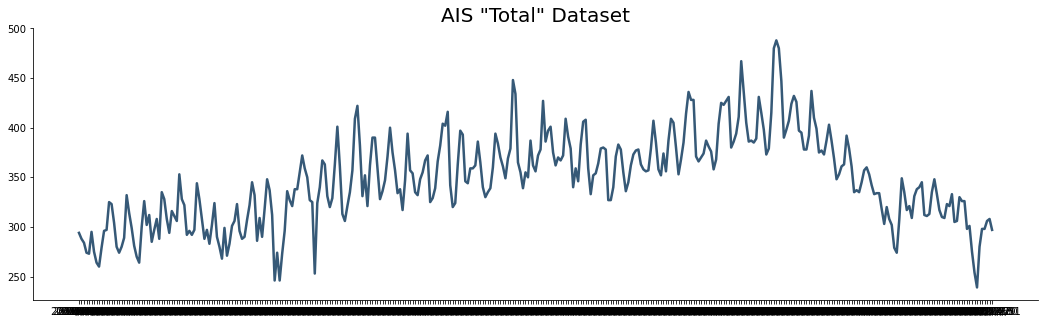

In [7]:
# Set up visualization

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Visualize
plt.title('AIS "Total" Dataset', size=20)
plt.plot(ais_total_df);

In [8]:
#Seperate the data into train and test using slicing
total_train_ind = int(len(ais_total_df)*0.8)
total_train = ais_total_df[:total_train_ind]
total_test = ais_total_df[total_train_ind:]

In [12]:
total_train

,Total
2018/01/01,294
2018/01/02,288
2018/01/03,284
2018/01/04,274
2018/01/05,273
...,...
2018/10/15,397
2018/10/16,395
2018/10/17,378
2018/10/18,378


In [10]:
# Define a generator for our Time Series
n_input = 2 
total_generator = TimeseriesGenerator(total_train, targets=total_train, length=n_input, batch_size=1)